# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.001
-0.001
-0.001
-0.002
-0.002
-0.002
-0.002
-0.004
-0.005
-0.005
-0.005
-0.006
-0.004
-0.007
-0.007
0.977
0.977
0.974
0.973
1.975
1.975
1.974
1.974
2.945
2.948
2.949
2.947
2.949
3.917
3.92
3.921
3.92
3.92
4.895
4.895
4.894
4.894
5.897
5.897
5.897
5.897
6.64
6.64
6.638
6.638
7.359
7.358
7.357
7.356
7.356
8.361
8.36
8.36
9.359
9.361
9.36
9.36
9.361
10.363
10.363
10.361
10.361
11.365
11.365
11.363
11.363
12.358
12.362
12.364
13.36
13.363
13.364
13.36
14.313
14.316
14.319
14.318
14.317
15.276
15.276
15.274
15.275
16.276
16.276
16.273
16.274
17.276
17.275
17.275
17.274
17.274
18.276
18.275
18.274
19.275
19.275
19.274
19.275
20.275
20.275
20.273
20.273
21.243
21.243
21.242
21.242
21.956
21.956
21.954
21.954
22.697
22.697
22.695
22.695
23.699
23.698
23.697
23.697
24.699
24.699
24.698
24.698
25.703
25.703
25.701
25.702
26.704
26.703
26.705
26.704
26.702
27.707
27.707
27.706
27.706
28.708
28.7

60.189
60.189
60.189
60.188
60.188
60.188
60.188
60.187
60.187
60.187
60.187
60.187
60.186
60.186
60.186
60.186
60.186
60.185
60.185
60.185
60.185
60.185
60.184
60.184
60.184
60.184
60.183
60.183
60.183
60.183
60.183
60.182
60.182
60.182
60.182
60.182
60.182
60.182
60.182
60.181
60.181
60.18
60.18
60.18
60.179
60.179
60.179
60.179
60.179
60.179
60.178
60.178
60.178
60.177
60.177
60.177
60.176
60.176
60.176
60.176
60.176
60.176
60.176
60.177
60.177
60.177
60.177
60.175
60.175
60.175
60.175
60.174


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1269,2538,60.175
1270,2540,60.175
1271,2542,60.175
1272,2544,60.175


<IPython.core.display.Javascript object>


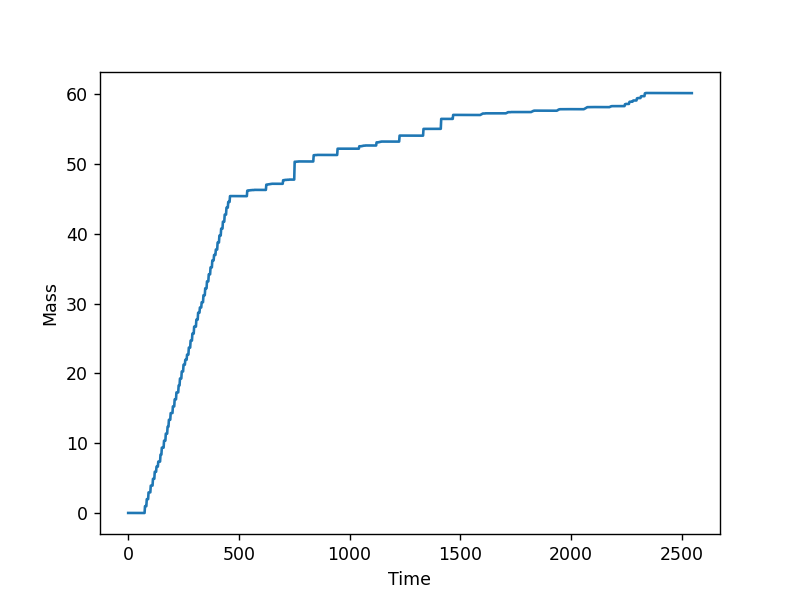

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_060223_S121-126.csv')